In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def cheb(n):
  from numpy.matlib import repmat as repmat
  if n == 0:
    D = 0 ; x = 1
    return D,x
  else:
    x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    c1 = np.array(np.ones(n-1)) ; c1 = np.append(c1,2) ; c1 = np.insert(c1,0,2)
    c2 = (-1)** np.arange(0,n +1,1)
    c = c1 * c2
    X = repmat(np.matrix(x).T,1,n+1)
    dX = X - X.T
    D = (np.matrix(c).T * 1/np.matrix(c)) / (dX+(np.eye(n+1)))
    D = D - np.diagflat(sum(D.T))
    return D,x

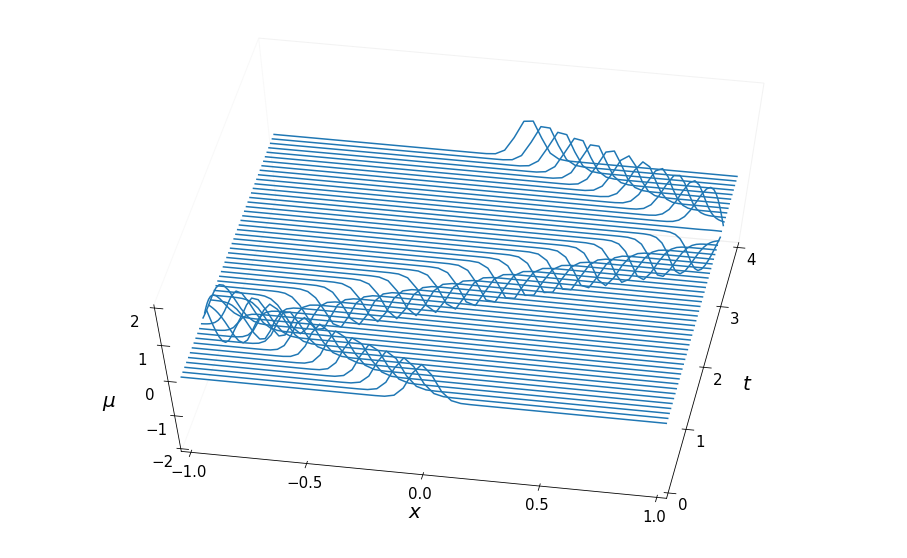

In [ ]:
from numpy import polyfit ,polyval

N = 80 ; D,x = cheb(N) ; dt = 8/N**2 ; x = x[1:N]
D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)
v = np.e**(-200*(x**2)) ; vold = np.e ** (-200*((x-dt)**2))
tmax = 4 ; tplot = 0.075 ; t = 0
plotgap =round(tplot/dt) ; dt = tplot/plotgap
nplots = round(tmax/tplot)
data = []
data.append(list(zip(x,v)))
tdata = [0]

for i in np.arange(1,nplots,1):
  for n in np.arange(1,plotgap +1,1):
    vnew = (dt**2) * np.array(D2*np.reshape(v,(-1,1))).flatten() + 2*v - vold
    vold = v ; v = vnew
  data.append(list(zip(x,v))) ; tdata = np.append(tdata,dt*i*plotgap)

from matplotlib.collections import LineCollection
import mpl_toolkits.mplot3d

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
line = LineCollection(data)
ax.add_collection3d(line,zs=tdata,zdir='y')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,4)
ax.set_zlim3d(-2,2)

ax.set_facecolor('white') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False


ax.set_xlabel('$x$', fontsize=20,labelpad=15)
ax.set_ylabel('$t$',fontsize=20,labelpad=15)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$\mu$', fontsize=20, rotation = 0,labelpad=15)
ax.zaxis._axinfo['juggled'] = (1,2,0)

ax.set_xticks([-1,-0.5,0,0.5,1]) ; ax.set_yticks([0,1,2,3,4]) ; ax.set_zticks([-2,-1,0,1,2])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(15)


ax.view_init(60, -80)

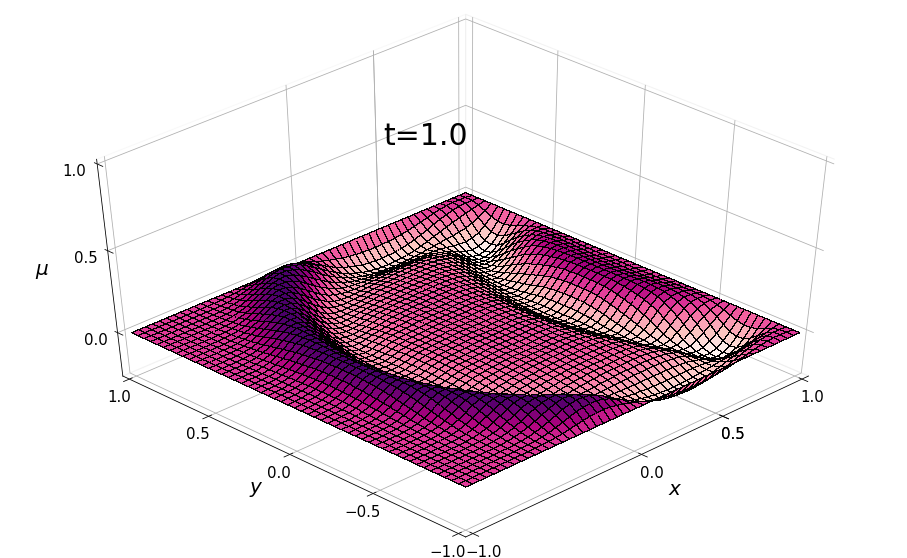

In [ ]:
plt.close()

from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N = 24 ; D,x = cheb(N) ; y = x
dt = 6/N**2

xx,yy = np.meshgrid(x[1:N],y[1:N])
xx = xx.flatten() ; yy = yy.flatten()
plotgap = round((1/3)/dt) ; dt = (1/3)/plotgap

vv = np.e**(-40*((xx - 0.4)**2 + yy**2))
vv = np.reshape(vv,(N-1,-1))
uu = np.zeros((N+1,N+1)) ; uu[1:N,1:N] = vv

vvold = vv

D2 = np.delete(np.delete((D **2),[0,N],0),[0,N],1)

fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')

for n in np.arange(1,3*plotgap +1,1):
  L = D2 * vv + vv * D2.T
  vvnew = (dt**2) * L  + 2*vv - vvold
  vvold = vv ; vv = vvnew

uu = np.zeros((N+1,N+1)) ; uu[1:N,1:N] = vvnew

xx,yy = np.meshgrid(x,y)

xxx = np.arange(-1,1 +0.04,0.04)
yyy = np.arange(-1,1 +0.04,0.04)

xi, yi =np.meshgrid(xxx,yyy)

interp_spline = Rbf(xx,yy,uu)
uuu = interp_spline(xi,yi)
ax.plot_surface(yi,xi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.25,1)

ax.set_facecolor('white') 
ax.grid() 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

ax.set_xlabel('$y$', fontsize=20,labelpad=15)
ax.set_ylabel('$x$',fontsize=20,labelpad=15)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$\mu$', fontsize=20, rotation = 0,labelpad=15)
ax.zaxis._axinfo['juggled'] = (1,2,0)
ax.text(1,0.5,0.5,'t='+str(round(dt*n,5)),fontsize=30)

ax.set_xticks([-1,-0.5,0,0.5,1]) ; ax.set_yticks([-1,0.5,0,0.5,1]) ; ax.set_zticks([0,0.5,1])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(15)

ax.view_init(45, -45)